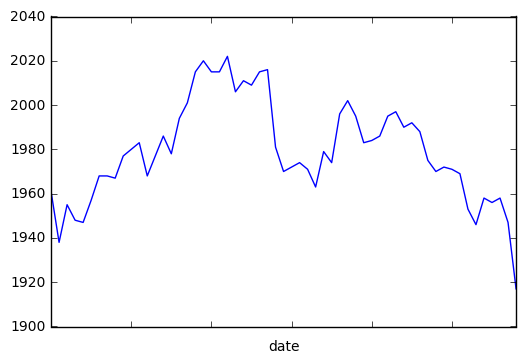

In [38]:
import pandas as pd

%matplotlib inline 

#2016-05-25 ~ 2016-02-29 까지의 코스피지수
series = pd.read_csv('kospi3.csv', header=0, index_col=0, squeeze=True)
series.plot()

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


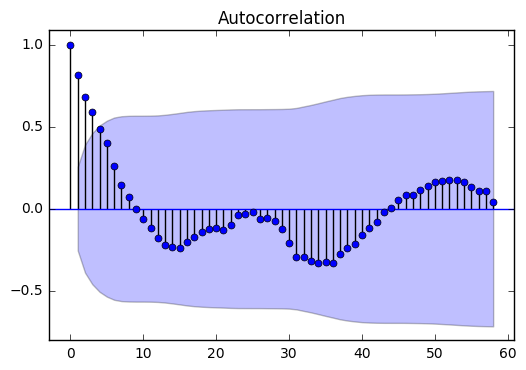

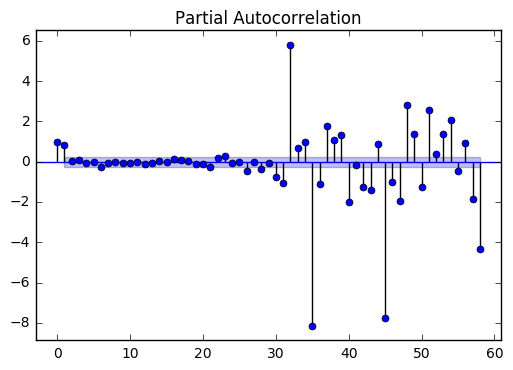

In [39]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ACF , PACF곡선 그리기 
plot_acf(series)
plot_pacf(series)
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


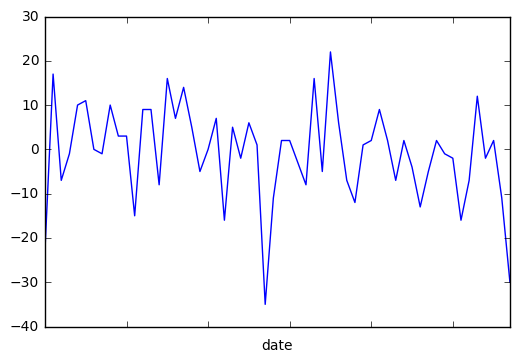

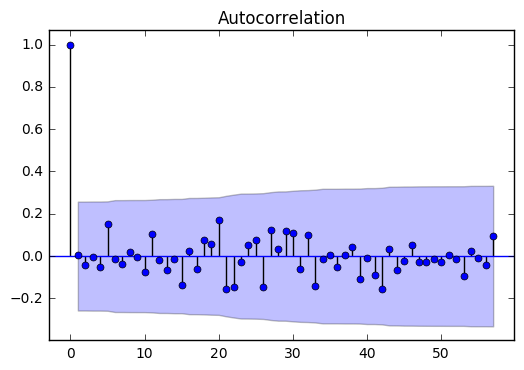

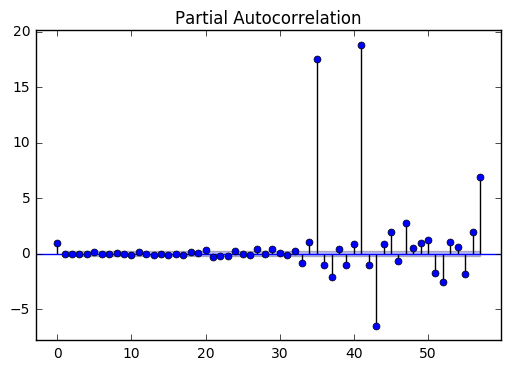

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#차분곡선 그래프
diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


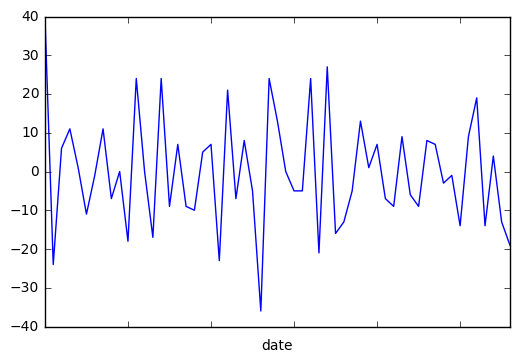

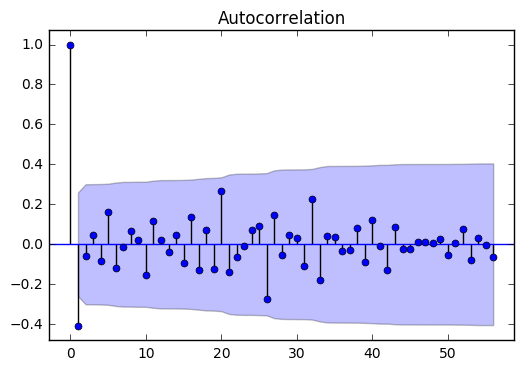

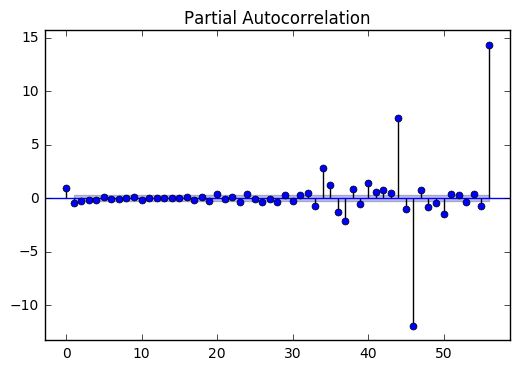

In [41]:
#차분의 차분의 그래프 그리기 

diff_2=diff_1.diff(periods=1).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
plot_pacf(diff_2)
plt.show()

In [51]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA(1,2,1)모델 만들고 훈련하기 
model = ARIMA(series, order=(1,2,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -217.690
Method:                       css-mle   S.D. of innovations             10.632
Date:                Thu, 08 Nov 2018   AIC                            443.379
Time:                        15:30:45   BIC                            451.551
Sample:                             2   HQIC                           446.555
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1465      0.080     -1.823      0.074      -0.304       0.011
ar.L1.D2.close    -0.0396      0.149     -0.266      0.791      -0.332       0.252
ma.L1.D2.close    -1.0000      0.050

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [47]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA(0,2,1)모델 만들고 훈련하기 
model = ARIMA(series, order=(0,2,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -217.725
Method:                       css-mle   S.D. of innovations             10.646
Date:                Thu, 08 Nov 2018   AIC                            441.450
Time:                        15:30:04   BIC                            447.579
Sample:                             2   HQIC                           443.832
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1464      0.084     -1.754      0.085      -0.310       0.017
ma.L1.D2.close    -1.0000      0.050    -20.045      0.000      -1.098      -0.902
                                    

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [48]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(0,2,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -218.944
Method:                       css-mle   S.D. of innovations             11.055
Date:                Thu, 08 Nov 2018   AIC                            441.887
Time:                        15:30:19   BIC                            445.974
Sample:                             2   HQIC                           443.475
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ma.L1.D2.close    -0.9430      0.059    -15.987      0.000      -1.059      -0.827
                                    Roots                                    
                  Real          Imaginary

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


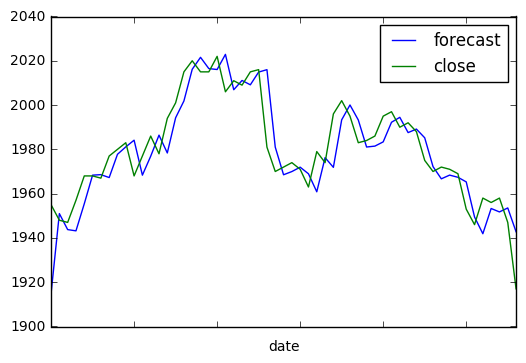

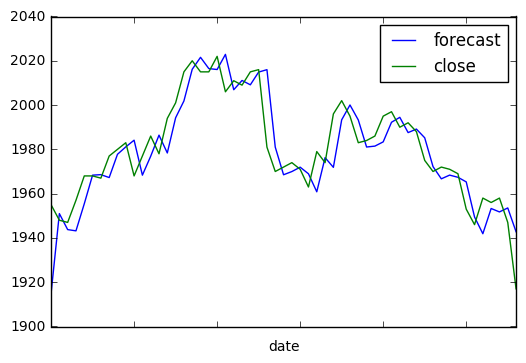

In [52]:
model_fit.plot_predict()

In [50]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([1913.77022316]), array([11.0549821]), array([[1892.10285639, 1935.43758993]]))


C:\Users\USER\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
